In [1]:
from orbit.utils.dataset import load_iclaims
from orbit.eda import eda_plot
import orbit.constants.palette as palette

import seaborn as sns
import pandas as pd

%load_ext autoreload
%autoreload

import numpy as np
from orbit.models.lgt import LGTFull
from orbit.models.dlt import DLTFull
import arviz as az
from orbit.diagnostics.plot import plot_param_diagnostics

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib import rc

In [4]:
df = load_iclaims()
df['week'] = pd.to_datetime(df['week'])
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


# Orbit Signature Palette and Plot Style  

In [5]:
# these are also included in the palette class
# primary color
uber_black = '#000000'
# secondary color 
uber_blue = '#276EF1'

# other colors 
uber_yellow = '#FFC043'
uber_green = '#3AA76D'
uber_red = '#D44333'
uber_brown = '#99644C'
uber_orange = '#ED6E33'
uber_purple = '#7356BF'
uber_white = '#FFFFFF'

# please see the style sheet for the base style for plots 

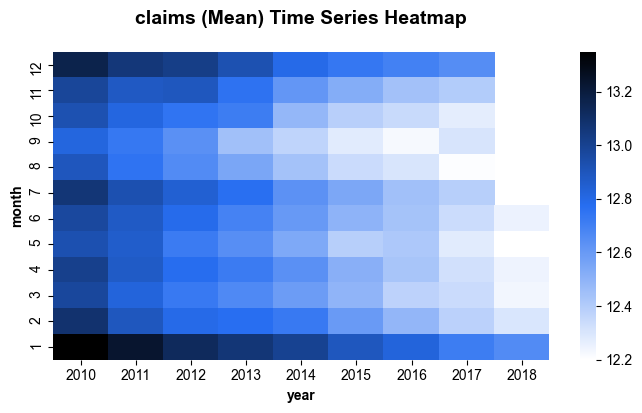

In [99]:
_ = eda_plot.ts_heatmap(df = df, date_col = 'week', value_col='claims', fig_width=8, fig_height=4, palette = palette.OrbitPalette.uber_blue_gradient.value)


In [29]:
%autoreload

In [173]:
matplotlib.get_configdir()

'/Users/ariel.jiang/.matplotlib'

In [25]:
%pwd

'/Users/ariel.jiang/Documents/python_virtual_envs/orbit'

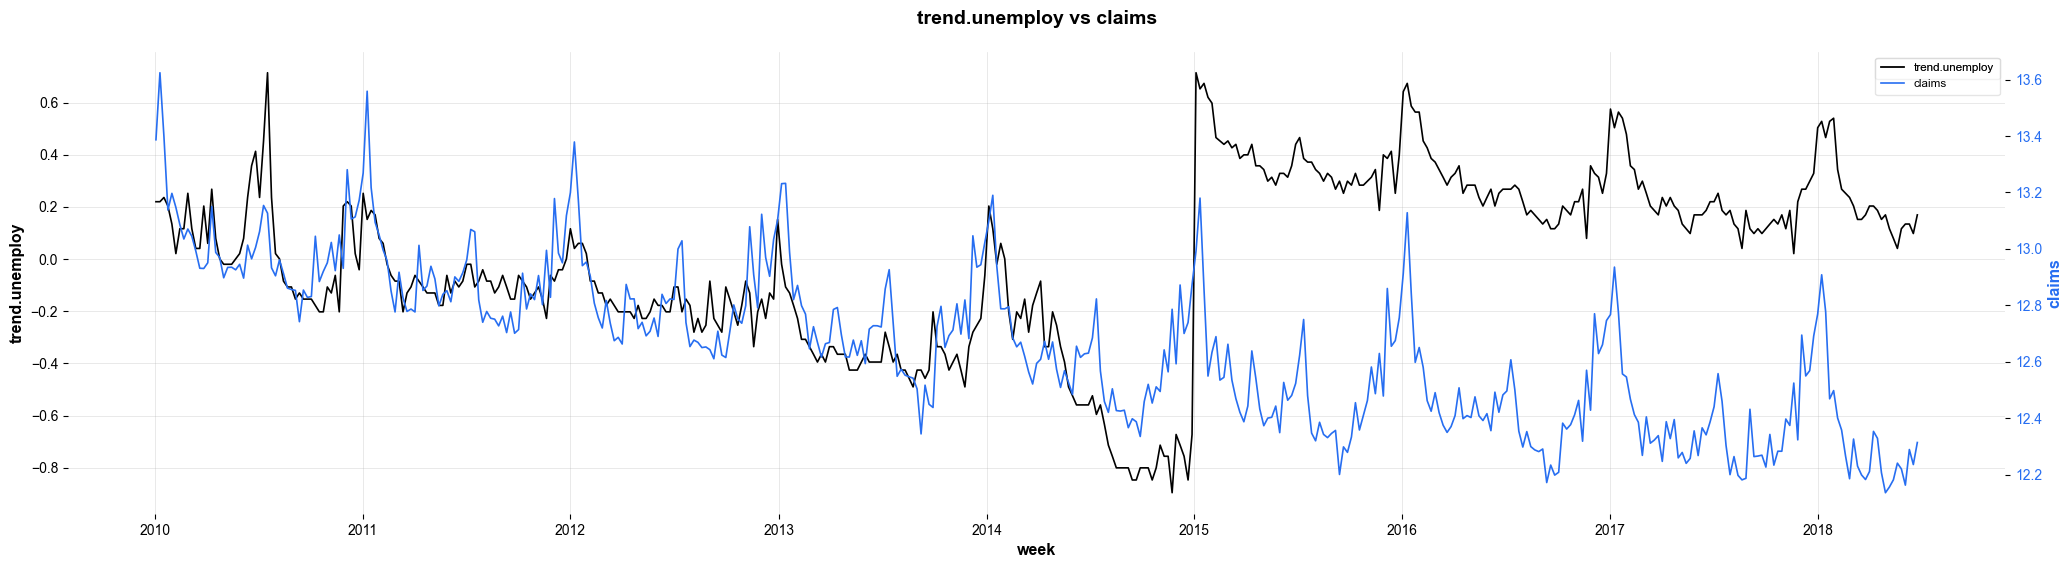

In [8]:
plt.style.use('default')
plt.style.use('../orbit/orbit/eda/OrbitSignature.mplstyle')

_ = eda_plot.dual_axis_ts_plot(df=df, var1='trend.unemploy', var2='claims', date_col='week', 
                               color1=uber_black, color2=uber_blue)

In [14]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404


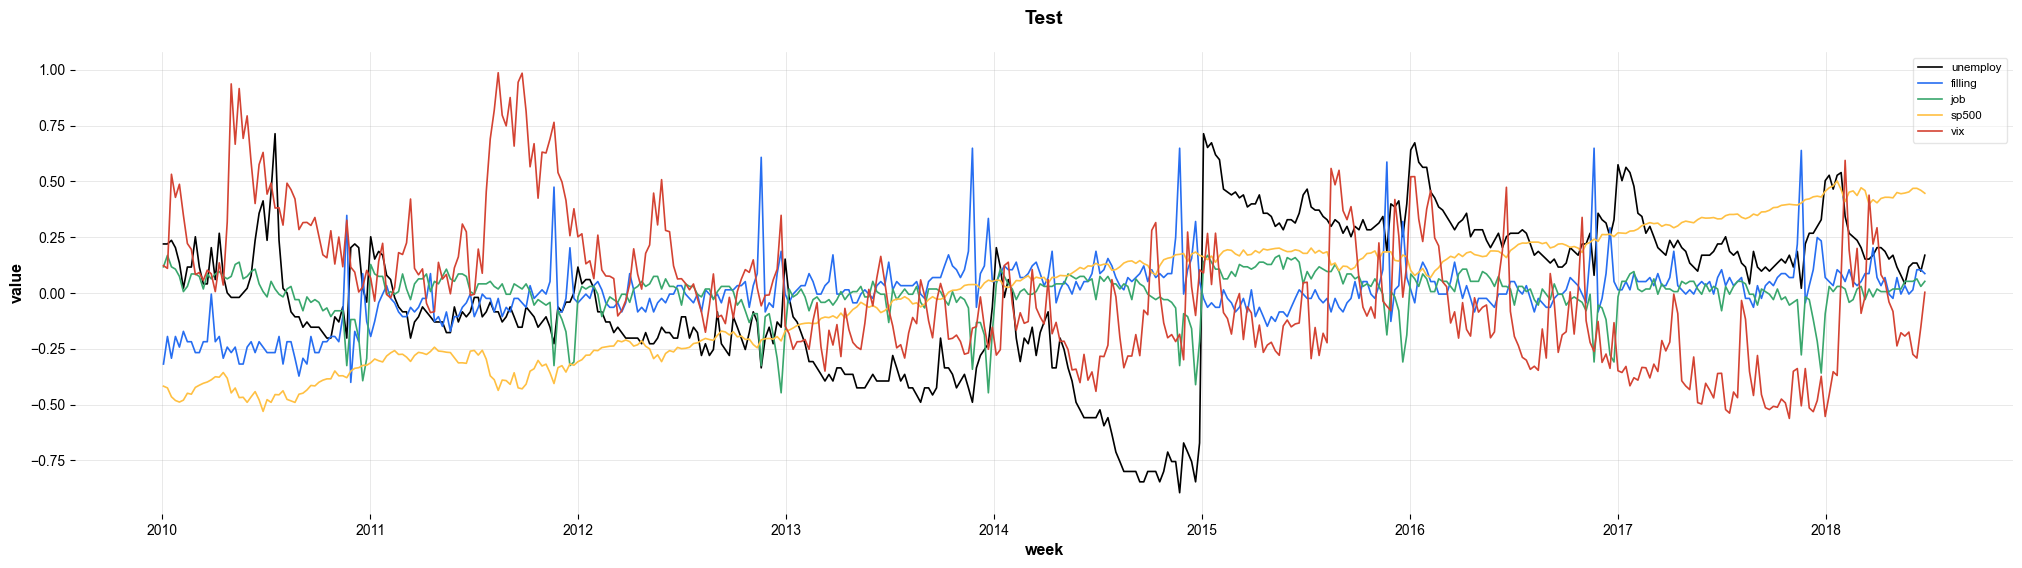

In [16]:
# plt.style.use('default')

fig, ax = plt.subplots(figsize=(25,6))

plt.plot(df['week'], df['trend.unemploy'], color=uber_black, label='unemploy')
plt.plot(df['week'], df['trend.filling'], color=uber_blue, label = 'filling')
plt.plot(df['week'], df['trend.job'], color=uber_green, label='job')
plt.plot(df['week'], df['sp500'], color=uber_yellow, label='sp500')
plt.plot(df['week'], df['vix'], color=uber_red,label='vix')

plt.title('Test')
plt.xlabel('week')
plt.ylabel('value')
plt.legend()

In [113]:
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix,holdout,pred_low,pred_high
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654,0,6.693298,20.079893
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445,0,6.812109,20.436327
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339,0,6.699371,20.098112
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645,0,6.568775,19.706324
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404,0,6.598380,19.795140


In [11]:
from random import randint

df['holdout'] = np.where(df['week']<='2017-06-24', 0,1)
df['pred_low'] = df['claims'] - df['claims']*0.01
df['pred_high'] = df['claims'] + df['claims']*0.01
df['multiplier'] = [randint(0,10)/1000 for k in df.index]
df['pred'] = df['claims'] + df['claims']*df['multiplier']
df.head()

,week,claims,trend.unemploy,trend.filling,trend.job,sp500,vix,holdout,pred_low,pred_high,multiplier,pred
0,2010-01-03,13.386595,0.219882,-0.318452,0.117500,-0.417633,0.122654,0,13.252729,13.520461,0.005,13.453528
1,2010-01-10,13.624218,0.219882,-0.194838,0.168794,-0.425480,0.110445,0,13.487976,13.760460,0.009,13.746836
2,2010-01-17,13.398741,0.236143,-0.292477,0.117500,-0.465229,0.532339,0,13.264754,13.532729,0.003,13.438938
3,2010-01-24,13.137549,0.203353,-0.194838,0.106918,-0.481751,0.428645,0,13.006174,13.268925,0.000,13.137549
4,2010-01-31,13.196760,0.134360,-0.242466,0.074483,-0.488929,0.487404,0,13.064792,13.328728,0.005,13.262744


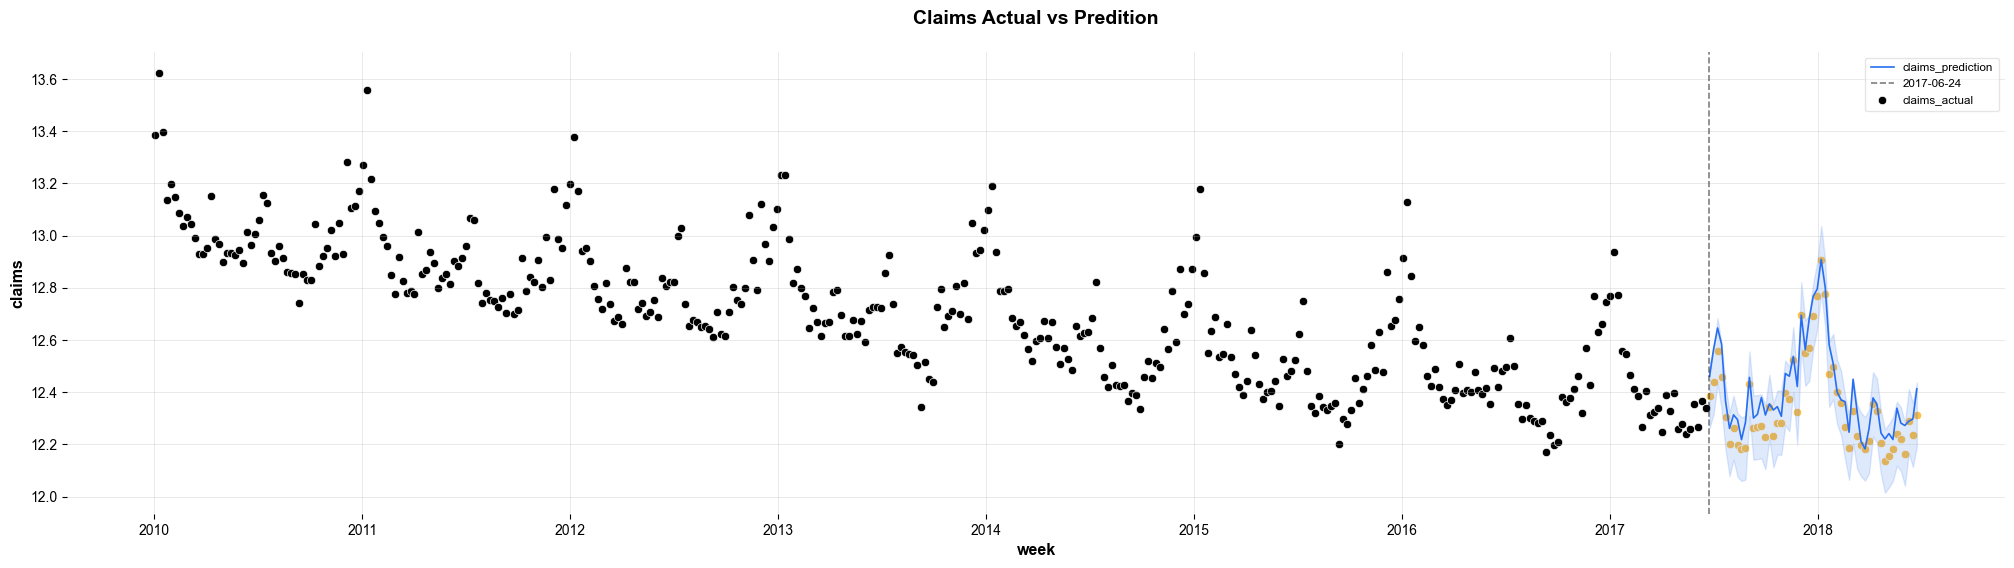

In [18]:

fig, ax = plt.subplots(figsize=(25,6))

sns.scatterplot(data=df[df['holdout']==0], x='week', y='claims', color=uber_black,label='claims_actual')
sns.scatterplot(data=df[df['holdout']==1], x='week', y='claims', color=uber_yellow)
sns.lineplot(data=df[df['holdout']==1], x='week', y='pred', color=uber_blue, label='claims_prediction')
plt.fill_between(df[df['holdout']==1]['week'], 
                 df[df['holdout']==1]['pred_low'], df[df['holdout']==1]['pred_high'], color=uber_blue,
                 alpha=0.15)

plt.axvline(x=pd.to_datetime('2017-06-24'),color=uber_black, linestyle='--',alpha=0.5, label='2017-06-24')
plt.title('Claims Actual vs Predition')
plt.legend();



/Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


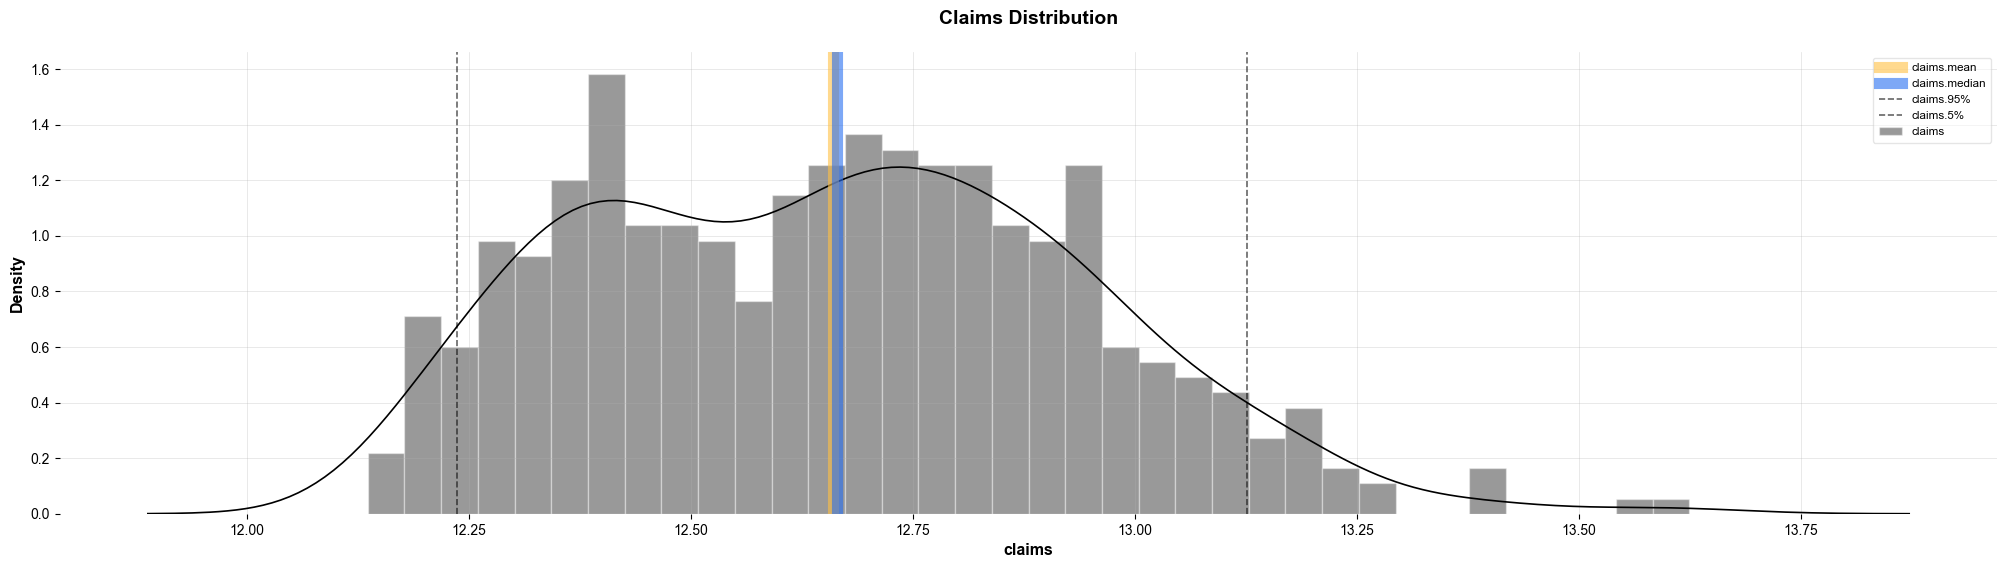

In [15]:
fig, ax = plt.subplots(figsize=(25,6))

# plt.hist(df['claims'],80, linewidth=2, color=uber_black, edgecolor=uber_white);
sns.distplot(df['claims'], hist=True, kde=True, 
             bins=int(180/5), color = uber_black, 
             hist_kws={'edgecolor':uber_white}, label='claims')

plt.axvline(df['claims'].mean(), color=uber_yellow, label='claims.mean', linewidth=8, alpha=0.6)
plt.axvline(df['claims'].median(), color=uber_blue, label='claims.median', linewidth=8, alpha=0.6)
plt.axvline(np.quantile(df['claims'],0.95), color=uber_black, label='claims.95%', linestyle='--', alpha=0.6)
plt.axvline(np.quantile(df['claims'],0.05), color=uber_black, label='claims.5%', linestyle='--', alpha=0.6)

plt.title('Claims Distribution')
plt.legend();


/Users/ariel.jiang/Documents/python_virtual_envs/orbit/env_orbit/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


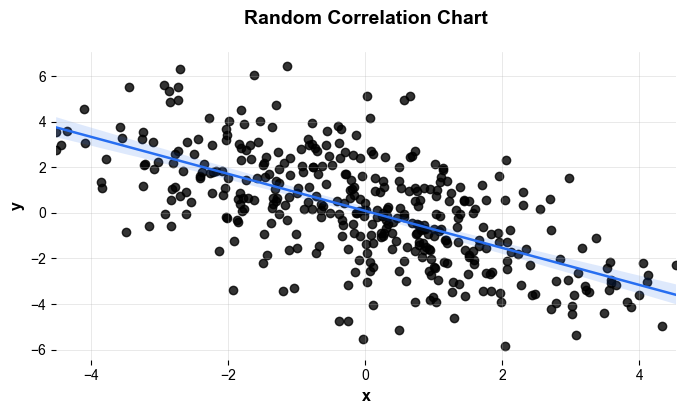

In [24]:
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(3, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)

fig, ax = plt.subplots(figsize=(8,4))

# sns.regplot(y[0], y[1], color = uber_black,label='claims', ci=95)
sns.regplot(y[0], y[1], color = uber_black,label='claims', ci=95, 
            line_kws={'color':uber_blue})

plt.title('Random Correlation Chart')
plt.xlabel('x')
plt.ylabel('y');

# Other Tests

In [ ]:
from matplotlib.colors import ListedColormap
uber_discrete = ListedColormap([uber_black, uber_blue, uber_green, uber_yellow, uber_red, uber_brown, uber_orange, uber_purple, uber_white])

In [104]:
# DATE_COL="week"
# RESPONSE_COL="claims"
# REGRESSOR_COL=['trend.unemploy', 'trend.filling', 'trend.job']

# lgt = LGTFull(
#     response_col=RESPONSE_COL,
#     date_col=DATE_COL,
#     seasonality=52,
#     seed=8888,
# )

# dlt.fit(df=df)

In [ ]:
# plot_param_diagnostics(dlt, which='trace', kind="trace", 
#                        legend=True,
#                        chain_prop={"color": ["r", "b","g","y"]});

In [115]:
test_color = palette.KTRPalette.KNOTS_SEGMENT

In [31]:
test_color.value

'#276ef1'

In [33]:
sequential = palette.SequentialPalette

In [35]:
sequential['Blue10'].value

['#edf5ff',
 '#d0e2ff',
 '#a6c8ff',
 '#78a9ff',
 '#4589ff',
 '#0f62fe',
 '#0043ce',
 '#002d9c',
 '#001d6c',
 '#001141']